In [39]:
import pandas as pd
import numpy as np

from scipy import stats
from matplotlib import pyplot
from scipy.stats import spearmanr

import matplotlib

import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

import matplotlib.font_manager as fm


fontSize=12
fontSizeSmall=10
labelSize=8


machine_precision=1e-6



SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

BIGGEST_SIZE = 18
# plt.rc('font', size=SMALL_SIZE, family='sans-serif', serif='Arial')          # controls default text sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, titleweight='bold')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE, labelweight='bold')    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text')



import seaborn as sns


table = pd.read_pickle("~/compressed_sensingv1/realdatasets/misc/Friedman-v3/A8.pkl")

tableg = table.T

B = pd.read_pickle("~/compressed_sensingv1/realdatasets/misc/Friedman-v3/B8.pkl")

Bdf = pd.DataFrame(B)

species_ones = [] 
for i in range(8):
    species = i
    species_ones.append(list(tableg[tableg[species]==1].index))
    
    
species_zeros = []
for i in range(8):
    species = i
    species_zeros.append(list(tableg[tableg[species]==0].index))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       


laml =  [1e-20,1e-10,1e-5,.01,.02,.03,.04,.05,.06,.0650,.0675,.07,0.08,0.1,0.13,0.15,0.18,0.2,0.5,1.0,2.0,3.0,5.0,10.0,20.0,50.0,100.0]
from sklearn.metrics import r2_score


In [40]:
list_present  = pd.read_pickle("~/compressed_sensingv1/realdatasets/misc/Friedman-v3/list-present-friedman.pkl")
sst_rel = pd.read_pickle("~/compressed_sensingv1/realdatasets/misc/Friedman-v3/Friedman-data-sst-relv2.pkl")

sp_list_provided = ["Ea","Pa","Pch","Pci","Pf","Pp","Pv","Sm"] 
sst_rel2 = sst_rel.rename(columns={"Sm":0,"Pv":1,"Pp":2,"Pf":3,"Pci":4,"Pch":5,"Pa":6,"Ea":7})
sstv3 = sst_rel2[[0,1,2,3,4,5,6,7,"well index"]]

sstv4 = sstv3.fillna(0)

sstv4.head(3)

,0,1,2,3,4,5,6,7,well index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [41]:
#### analysis part begins 
crossdf = pd.read_pickle("WH-REL-analysis.pkl")
crosslindf = pd.read_pickle("sigma-REL-analysis.pkl")

In [42]:
n = 2**7
random_state = 78
cv_splitsl = [3,5]

In [43]:
xshow = laml
xstr =  [str(x) for x in xshow[4:]]
ary = ['%.e' % x for x in xshow[:4]]
ary.append(xstr)
xf = list(pd.DataFrame(ary)[0].explode().values)

In [44]:
crossdf.head(2)

,k-fold,sp,lambda,nnseagg,r2agg,mapeagg,slagg,intagg,rlinagg,means on right,nnseavg,r2avg,mapeavg,slavg,intavg,rlinavg,testact,testpred
0,3,0,1.000000e-20,1.026970e-264,-9.737383e+263,2.698700e+146,-1.843152e+131,1.059119e+131,0.037234,break,0.237009,-2.952971e+264,2.862257e+146,-1.544050e+131,8.103632e+130,0.271835,"[1.0, 0.1312692082501378, 0.0, 0.6361513826937...","[1.1597951430059514e+118, 0.0, 0.0, 0.0, 0.0, ..."
1,3,0,1.000000e-10,6.809055e-01,5.313675e-01,5.078612e+11,7.021829e-01,8.251542e-02,0.568743,break,0.581148,2.188405e-01,4.937539e+11,9.628371e-01,6.947728e-02,0.677803,"[1.0, 0.1312692082501378, 0.0, 0.6361513826937...","[0.5776886491175913, 0.0035677380009272452, 0...."


In [45]:
best =  [] 
for cv in cv_splitsl:
    cf = crossdf[crossdf["k-fold"]==cv]
    for species in range(8):
        sp = cf[cf["sp"]==species]
        best.append([species,cv,sp.T[sp["nnseagg"].idxmax()]["nnseagg"],sp.T[sp["nnseagg"].idxmax()]["lambda"]])

In [46]:
bestlin =  [] 
for cv in cv_splitsl:
    cf = crosslindf[crosslindf["k-fold"]==cv]
    for species in range(8):
        sp = cf[cf["sp"]==species]
        bestlin.append([species,cv,sp.T[sp["nnseagg"].idxmax()]["nnseagg"],sp.T[sp["nnseagg"].idxmax()]["lambda"]])


In [47]:
bestwhdf = pd.DataFrame(best)
bestlindf = pd.DataFrame(bestlin)

In [48]:
bestwhdf

,0,1,2,3
0,0,3,0.812483,0.0600
1,1,3,0.717919,0.2000
2,2,3,0.822551,0.2000
3,3,3,0.721680,0.2000
4,4,3,0.481555,0.5000
5,5,3,0.673409,0.0500
6,6,3,0.749182,0.0300
7,7,3,0.562015,0.2000
8,0,5,0.846967,0.1000
9,1,5,0.670956,0.2000


In [49]:
bestwhdf.head(2)
data1 = bestwhdf[bestwhdf[1]==3][2]
data2 = bestlindf[bestlindf[1]==3][2]


colors1 = sns.color_palette("summer").as_hex()
pcol1 = colors1[0]
colors2 = sns.color_palette("flare").as_hex()
pcol2 = colors2[3]


sampper = ["Compressive Sensing","$l1$-regularised regression"] 
colors = [pcol2,pcol1]

data = [data1,data2]

In [50]:
h = pd.DataFrame(data1)
h["lin"] = data2

h = h.rename(columns={2:"wh"})

print("means=" ,h["wh"].mean(),h["lin"].mean())
h.index = np.arange(0,8,1)

def statistic(x, y, axis):

    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

statistic(h["wh"],h["lin"],0)
from scipy import stats 
res = stats.permutation_test((h["wh"], h["lin"]), statistic, vectorized=True,

                       n_resamples=np.inf, alternative='greater',permutation_type='samples')

print("statistic= ",res.statistic)

print("p-value = ",res.pvalue)
#res.null_distribution

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

    
from scipy.stats import mannwhitneyu,wilcoxon,kruskal,brunnermunzel
w, p2= wilcoxon(h["wh"].values, h["lin"].values, alternative='greater')
alpha = 0.05
if p2 > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
print("Wilcoxon stat = ",w,p2)

means= 0.692599317249804 0.6619749228882811
statistic=  0.030624394361522755
p-value =  0.09765625
Same distribution (fail to reject H0)
Wilcoxon stat =  26.0 0.15625


In [51]:
obs_sp = []
pred_sp = []
for sp in range(8):
    sp3 = crossdf[crossdf["sp"]==sp]
    cv3 = sp3[sp3["k-fold"]==3]
    yobs =  cv3[cv3["lambda"]==bestwhdf.iloc[sp][3]]["testact"].values[0]
    obs_sp.append(yobs)
    ypred =  cv3[cv3["lambda"]==bestwhdf.iloc[sp][3]]["testpred"].values[0]
    pred_sp.append(ypred)
    rval2 = r2_score(yobs,ypred)
    gop2 = 1/(2-rval2)
    #plt.scatter(yobs,ypred,color="red")

In [52]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [53]:
colorlist = ["magenta","deepskyblue","green","darkorange","dimgrey"]

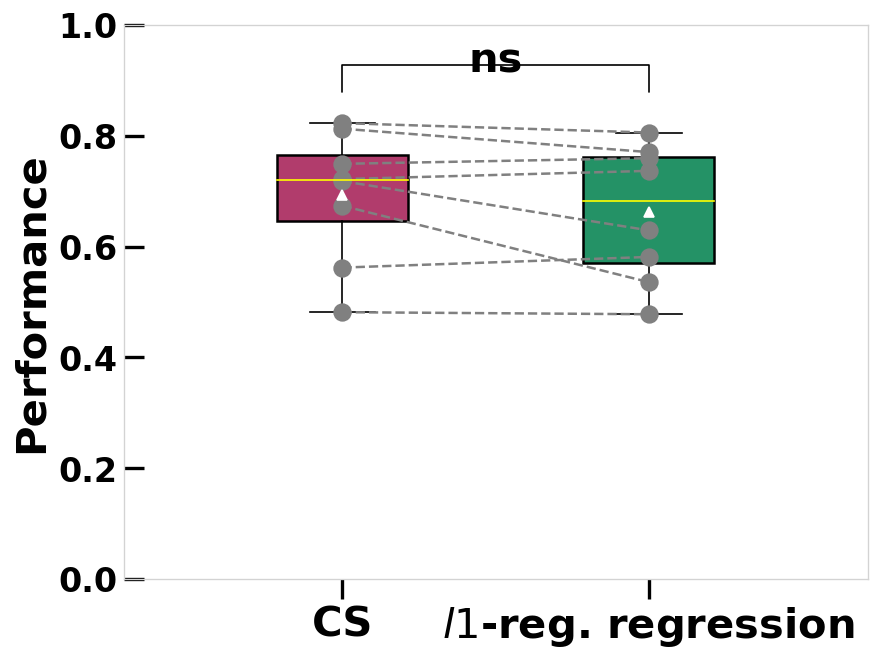

In [54]:

sampper = ["CS","$l1$-reg. regression"] 

fig, ax = plt.subplots(figsize=(8,6),dpi=120)
meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"white"}
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True,meanprops=meanprops,medianprops=dict(color="yellow"),positions=[0.5,1.2],widths=0.3)
for item in ['boxes']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, edgecolor="k",facecolor=color,linewidth=1.5)
for item in ['fliers']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color,linewidth=1)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color="k",linewidth=1)
plt.ylim(-0.0,1);
gs_font2 = fm.FontProperties(size=25, weight='bold')
plt.ylabel("Performance",font_properties=gs_font2);
 
gs_font4 = fm.FontProperties(size=20, weight='bold')

plt.yticks(fontproperties=gs_font4,rotation=0,color="grey")
gs_font3 = fm.FontProperties(size=25, weight='bold')
plt.xticks([0.5,1.2],sampper,rotation=0,color="grey",fontproperties=gs_font3)
ax.tick_params(axis="x",direction='out', length=12, width=2, colors='black',
              grid_color='lightgray', grid_alpha=0.9)
ax.tick_params(axis="y",direction='in', length=12, width=2, colors='black',
              grid_color='lightgray', grid_alpha=0.9) 
ticklabelcolor = 'lightgrey'
#plt.grid(linestyle=':', linewidth=1, color='grey')    
ax.spines['top'].set_color(ticklabelcolor)
ax.spines['bottom'].set_color(ticklabelcolor)
ax.spines['left'].set_color(ticklabelcolor)
ax.spines['right'].set_color(ticklabelcolor)
listpp = h[["wh","lin"]].values
list2 = [0.5,1.2]
for i in range(len(listpp)):
    plt.plot(list2,listpp[i],ls="dashed",color="grey",marker="o",markersize=10)
y_max = np.max(np.concatenate((h["wh"].values,h["lin"].values)))
y_min = np.min(np.concatenate((h["wh"].values,h["lin"].values)))
ax.annotate("", xy=(0.5, y_max+0.05), xycoords='data',
           xytext=(1.2, y_max+0.05), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec="k",
                           connectionstyle="bar,fraction=0.1"))
ax.text(.85, y_max + abs(y_max - y_min)*0.325, stars(res.pvalue),
       horizontalalignment='center',
       verticalalignment='center',fontproperties=gs_font2);
#plt.savefig("will-rel-abun-boxplots-compare.svg")

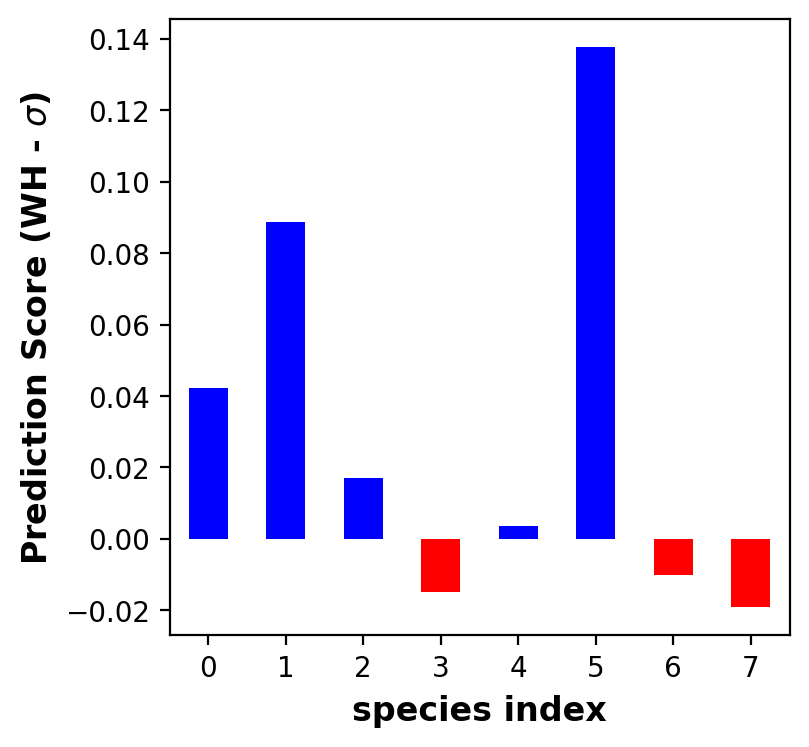

In [55]:
plt.figure(figsize=(4,4),dpi=200)
df1 = pd.DataFrame(h["wh"]-h["lin"])
df1['positive'] = df1[0] > 0
x = df1.index
df1[0].plot(kind="bar", rot=0,color=df1.positive.map({True: 'b', False: 'r'}));
plt.ylabel("Prediction Score (WH - $\sigma$)");
plt.xlabel("species index",rotation=0);
#plt.savefig("will-sp.png")

In [56]:
df1.to_pickle("fried-sp-v2.pkl")

In [57]:
obs_sp = []
pred_sp = []
for sp in range(8):
    sp3 = crossdf[crossdf["sp"]==sp]
    cv3 = sp3[sp3["k-fold"]==3]
    yobs =  cv3[cv3["lambda"]==bestwhdf.iloc[sp][3]]["testact"].values[0]
    obs_sp.append(yobs)
    ypred =  cv3[cv3["lambda"]==bestwhdf.iloc[sp][3]]["testpred"].values[0]
    pred_sp.append(ypred)
    rval2 = r2_score(yobs,ypred)
    gop2 = 1/(2-rval2)
    #plt.scatter(yobs,ypred,color="red")

In [58]:
slope, intercept,r_value, p_value, std_err = stats.linregress(flatten(obs_sp),flatten(pred_sp))
print("slope, intercept, r2 = ",slope,intercept,r_value**2)

x = np.linspace(0,1,1000)
y = slope*x + intercept

x45 = np.linspace(0,1,1000)
y45 = x45

slope, intercept, r2 =  0.7168555872149859 0.08831122688058085 0.6968385971501402


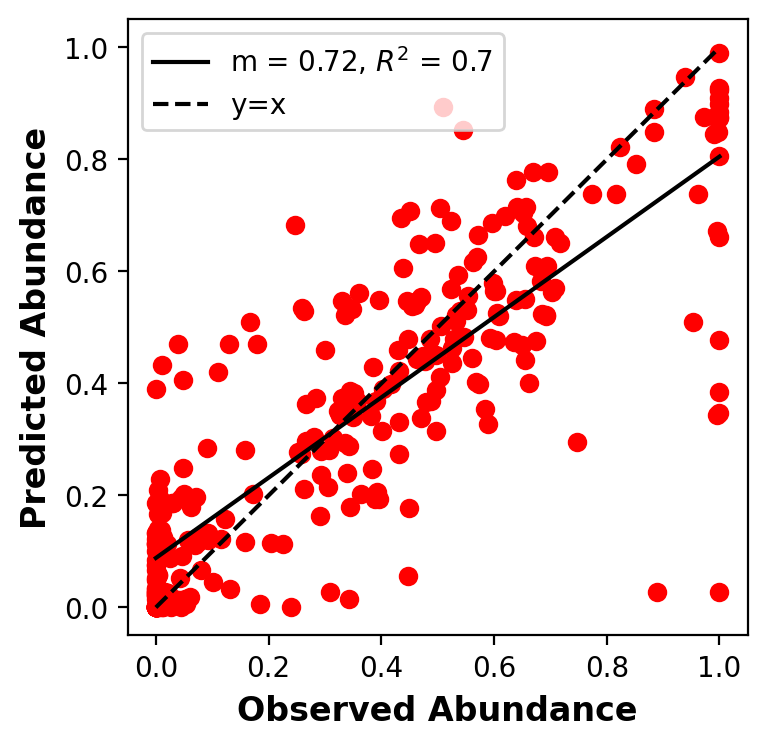

In [59]:
plt.figure(figsize=(4,4),dpi=200)
plt.scatter(flatten(obs_sp),flatten(pred_sp),color="red");
plt.xlabel("Observed Abundance");
plt.ylabel("Predicted Abundance");
plt.plot(x,y,"black",label="m = " +str(np.round(slope,2))+", " +"$R^2$" +" = "+ str(np.round(r_value**2,2)))
plt.plot(x45,y45,"black",ls="dashed",label="y=x");
plt.legend();

In [60]:
datawill = [flatten(obs_sp),flatten(pred_sp)]
pd.to_pickle(datawill,"fried-v2-cvabun.pkl")

In [61]:
pd.to_pickle(h,"Fried-v2-per.pkl")

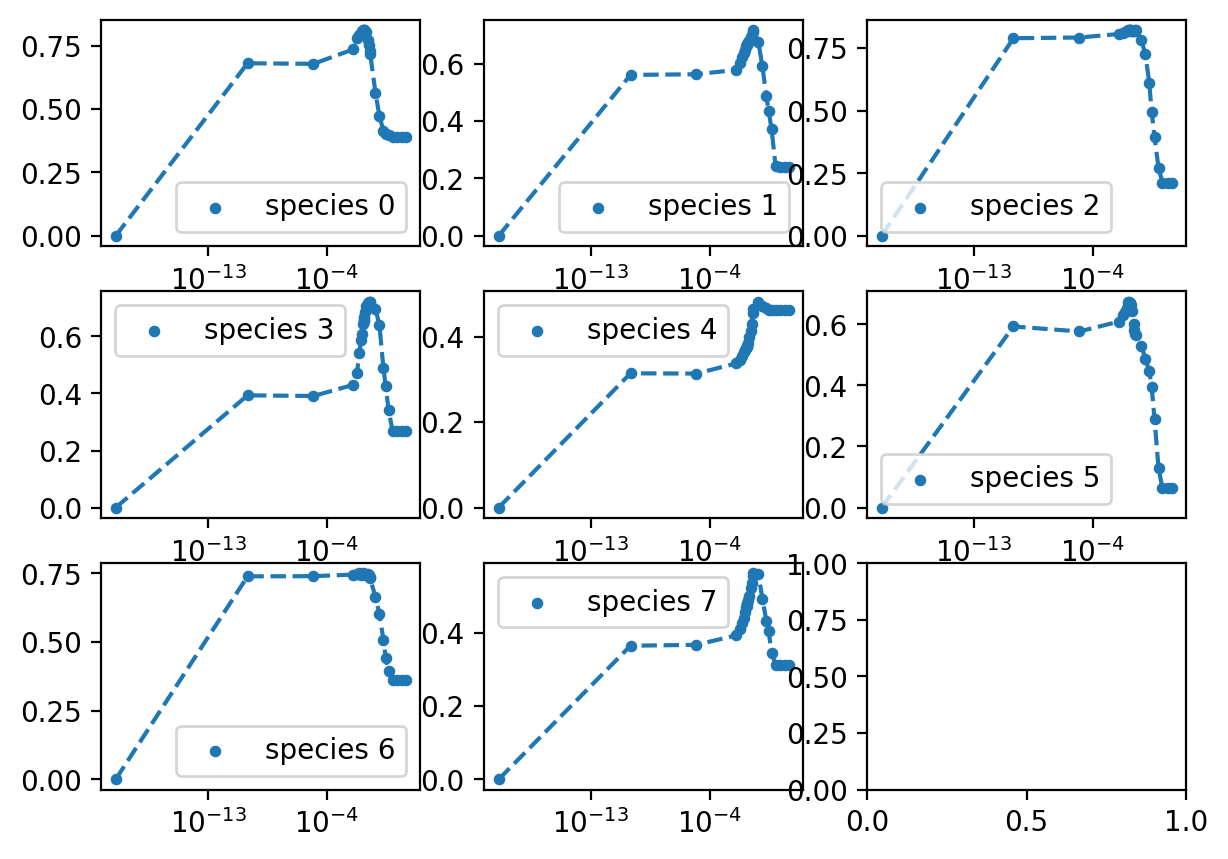

In [62]:
fig,ax = plt.subplots(3,3,figsize=(7,5),dpi=200)

for species in range(8):
    plt.subplot(3,3,species+1)
    spper = crossdf[crossdf["sp"]==species]
    kdf = spper[spper["k-fold"]==3]
    plt.scatter(kdf["lambda"],kdf["nnseagg"],s=10,label="species " + str(species))
    plt.plot(kdf["lambda"],kdf["nnseagg"],ls="dashed")
    plt.legend()
    plt.xscale("log")


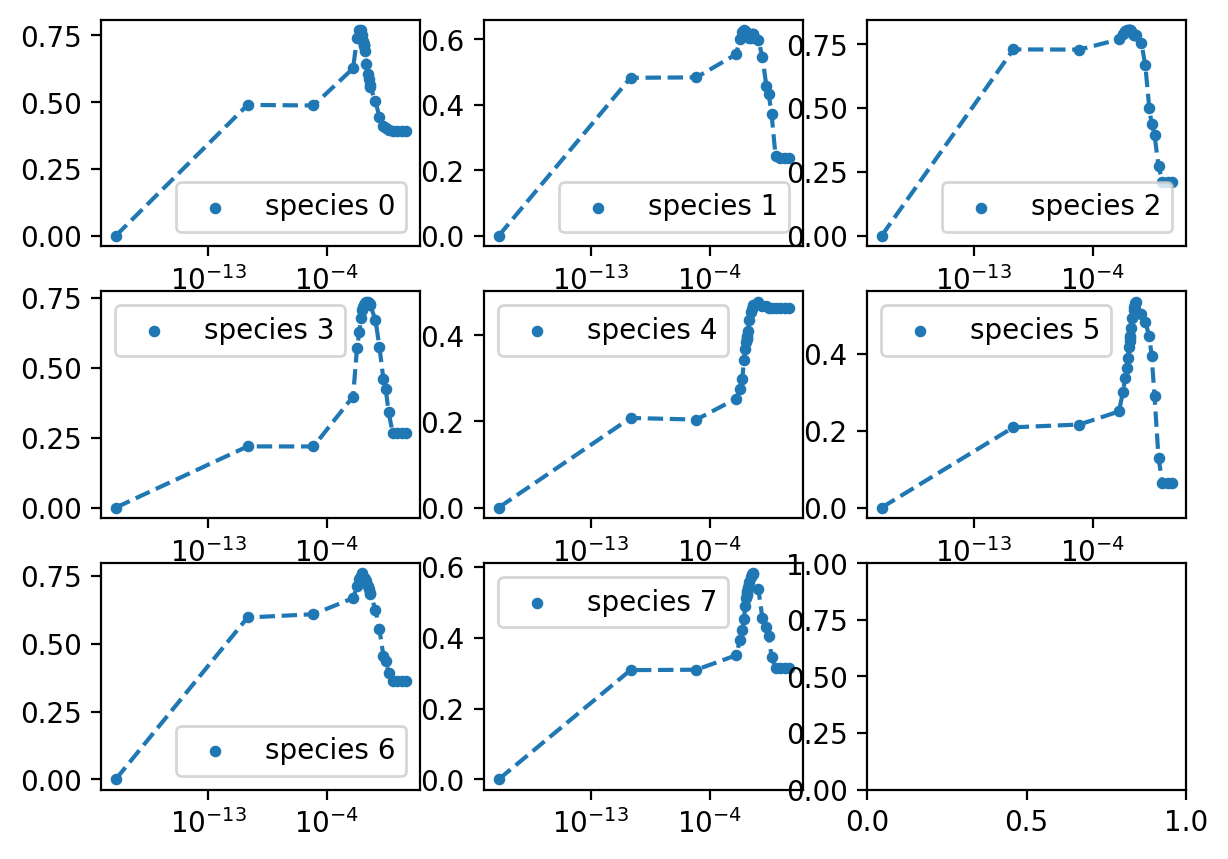

In [63]:
fig,ax = plt.subplots(3,3,figsize=(7,5),dpi=200)

for species in range(8):
    plt.subplot(3,3,species+1)
    spper = crosslindf[crosslindf["sp"]==species]
    kdf = spper[spper["k-fold"]==3]
    plt.scatter(kdf["lambda"],kdf["nnseagg"],s=10,label="species " + str(species))
    plt.plot(kdf["lambda"],kdf["nnseagg"],ls="dashed")
    plt.legend()
    plt.xscale("log")


In [65]:
h.to_pickle("Fried-l1-cs.pkl")